# Python Principal Component Analysis (PCA) for 2D data

## 1. Generate data from a bivariate normal distribution

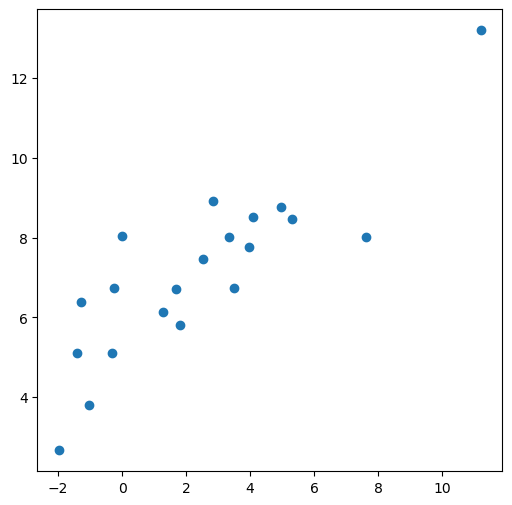

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

mu = np.array([4, 8])
cov = np.array([[9, 5], [5, 4]])
np.random.seed(0)
n = 20
arr2d_x = np.random.multivariate_normal(mu, cov, n)

plt.figure(figsize=(6, 6))
plt.scatter(arr2d_x[:, 0], arr2d_x[:, 1])


## 2. Standardize the data and performing PCA

Loading vector of PCA components: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


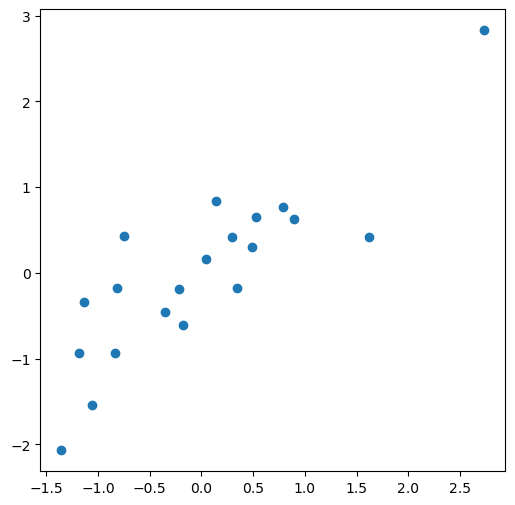

In [16]:
from scipy.stats import zscore
from sklearn.decomposition import PCA

arr2d_xs = zscore(arr2d_x)

pca = PCA(n_components=2)
pca.fit(arr2d_xs)
print("Loading vector of PCA components: \n", pca.components_)

plt.figure(figsize=(6, 6))
plt.scatter(arr2d_xs[:, 0], arr2d_xs[:, 1])



In [18]:
arr2d_score = pca.transform(arr2d_xs)
print("PCA score for components: \n", arr2d_score)

PCA score for components: 
 [[-1.49745256 -0.16958455]
 [-0.2270766  -0.8276829 ]
 [-1.84353835  0.34473246]
 [-0.56790002  0.07496249]
 [ 0.83580067 -0.0892182 ]
 [ 0.69135034 -0.493617  ]
 [-0.2888559  -0.01937563]
 [ 0.14056481 -0.08493346]
 [-1.25563557  0.07067448]
 [ 0.11690217  0.36849941]
 [ 3.93301858 -0.07018517]
 [-0.55395574  0.30143391]
 [-2.42085509  0.50633188]
 [ 0.55567156  0.12928841]
 [-1.04035039 -0.56199712]
 [ 0.50832943 -0.08865223]
 [ 1.43900481  0.84723175]
 [ 1.10131742  0.01762492]
 [-0.70467024 -0.44774858]
 [ 1.07833068  0.19221511]]


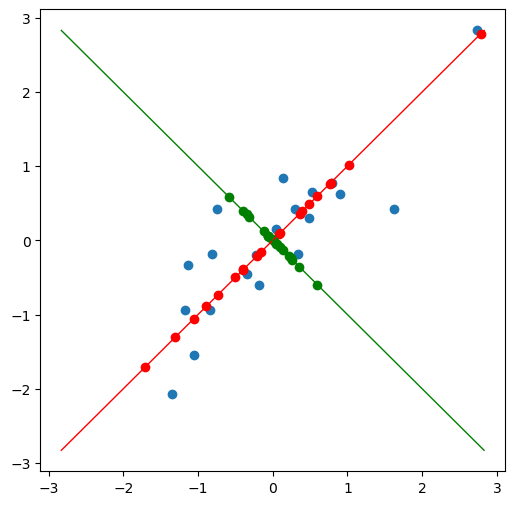

In [22]:
from numpy import reshape


arr2d_line0 = np.array([-4*pca.components_[0], 4*pca.components_[0]])
arr2d_line1 = np.array([-4*pca.components_[1], 4*pca.components_[1]])

arr2d_feat0 = arr2d_score[:, 0].reshape(n, 1).dot(pca.components_[0].reshape(1, 2))
arr2d_feat1 = arr2d_score[:, 1].reshape(n, 1).dot(pca.components_[1].reshape(1, 2))

plt.figure(figsize=(6, 6))
plt.scatter(arr2d_xs[:, 0], arr2d_xs[:, 1])
plt.plot(arr2d_line0[:, 0], arr2d_line0[:, 1], linewidth=1, c="r")
plt.plot(arr2d_line1[:, 0], arr2d_line1[:, 1], linewidth=1, c="g")
plt.scatter(arr2d_feat0[:, 0], arr2d_feat0[:, 1], c="r")
plt.scatter(arr2d_feat1[:, 0], arr2d_feat1[:, 1], c="g")

[0.92784038 0.07215962]


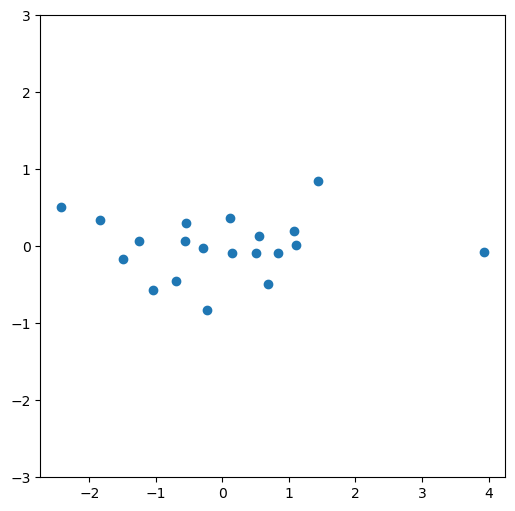

In [23]:
print(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 6))
plt.ylim(-3, 3)
plt.scatter(arr2d_score[:, 0], arr2d_score[:, 1])